### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN
from sklearn import datasets

import warnings
warnings.filterwarnings('ignore')

### Load data

In [2]:
df = pd.read_csv('XBEE.csv')
df

,RSSI,Data rate
0,-80,6.52
1,-80,3.64
2,-79,2.66
3,-82,2.70
4,-79,2.66
...,...,...
1076,-109,1.06
1077,-112,0.96
1078,-112,1.33
1079,-109,1.16


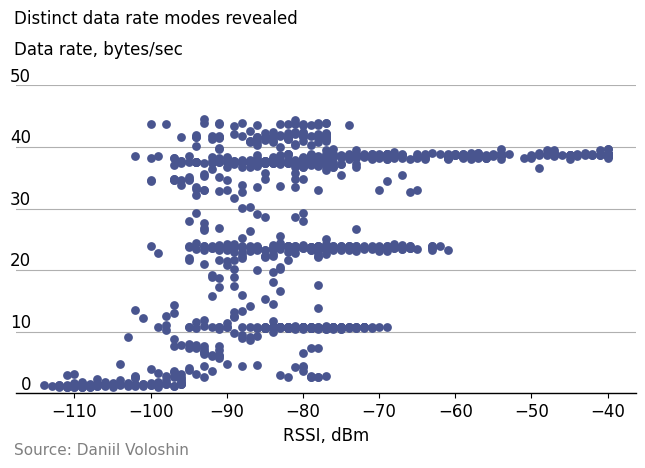

In [3]:
# Plot clusters
color_palette = [(191,14,9),(246,66,60),(255,169,166),(255,206,111),(255,228,175),(175,197,218),(121,158,194),(73,85,143),(235,233,224)]
plt.figure(figsize=(8, 4))

marker_size = 40
marker_alpha = 1
marker_edgecolor = (0.0,0.0,0.0)
marker_linewidth = 0 #0.2

plt.scatter(df['RSSI'],df['Data rate'], s = marker_size, zorder=2, c = [x/255 for x in color_palette[7]], alpha=marker_alpha, linewidth=marker_linewidth, edgecolor=marker_edgecolor)

plt.grid(axis='y', linestyle='-')
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=12);
plt.yticks(np.arange(0, 60, step=10), fontsize=12);
plt.ylim([0, 50])
plt.xlabel('RSSI, dBm', fontsize=12)
plt.tick_params(axis='y', length=0, which='both', pad=-11)
plt.gca().set_yticklabels(plt.gca().get_yticks(), va='bottom');
font_properties = {'size': 12}

# Text
title_string = "Distinct data rate modes revealed"
subtitle_string = "Data rate, bytes/sec"
source_str = "Source: Daniil Voloshin"
plt.text(-118, 60, title_string, color='black', fontsize=12, bbox=dict(facecolor='white', edgecolor='white', pad=1))
plt.text(-118, 55, subtitle_string, color='black', fontsize=12, bbox=dict(facecolor='white', edgecolor='white', pad=1))
plt.text(-118, -10, source_str, color='#808080', fontsize=11, bbox=dict(facecolor='white', edgecolor='white', pad=1))


#plt.savefig("plot1.png", dpi=400, bbox_inches='tight')
plt.show()

### Clustering (K-Means)

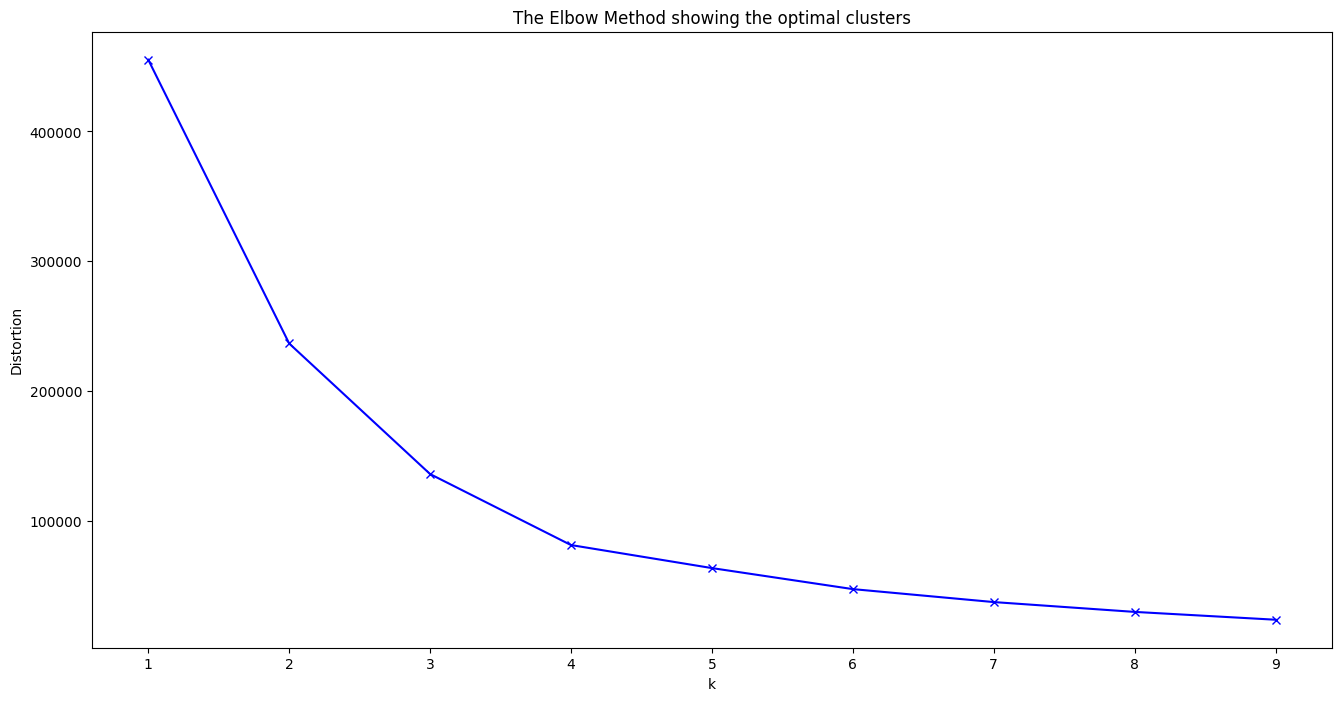

In [4]:
# Prepare data
x = df
#x = df[200:len(df)-1]
x = np.array(x)

# Collecting the distortions into list
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x)
    distortions.append(kmeanModel.inertia_)
# Plotting the distortions
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal clusters')
plt.show()

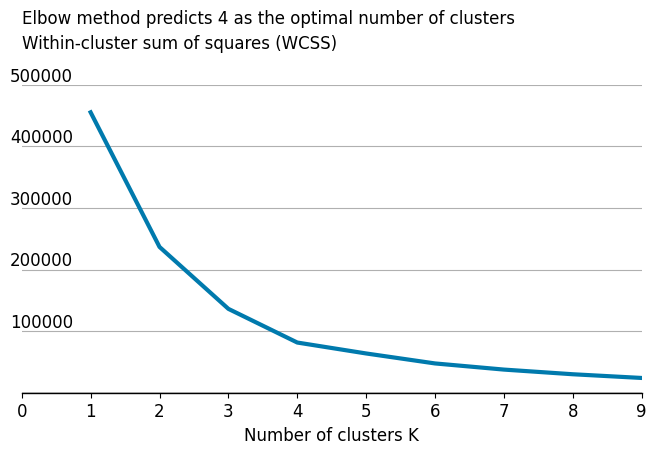

In [5]:
# Pretty plot of distorions
color_palette = ['#1f5d99','#3cbbd1','#f9a223','#007aad']
plt.figure(figsize=(8, 4))
plt.plot(K, distortions, linewidth=3, zorder=2, color=color_palette[3]) #zorder makes grid lines appear behind the bars
plt.grid(axis='y', linestyle='-')
plt.axhline(0, color='black', linestyle='-', linewidth=1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(np.arange(0, 10, step=1), fontsize=12);
plt.yticks(np.arange(100000, 600000, step=100000), fontsize=12);
plt.xlim([0, 9])
plt.ylim([0, 500000])
plt.xlabel('Number of clusters K', fontsize=12)
plt.tick_params(axis='y', length=0, which='both', pad=-37)
plt.gca().set_yticklabels(plt.gca().get_yticks(), va='bottom');


# Text
title_string = "Elbow method predicts 4 as the optimal number of clusters"
subtitle_string = "Within-cluster sum of squares (WCSS)"
#source_str = "Source: "
plt.text(0, 600000, title_string, color='black', fontsize=12, bbox=dict(facecolor='white', edgecolor='white', pad=1))
plt.text(0, 560000, subtitle_string, color='black', fontsize=12, bbox=dict(facecolor='white', edgecolor='white', pad=1))


#plt.savefig("plot2.png", dpi=400, bbox_inches='tight')
plt.show()

In [6]:
# Define the model
kmeans_model = KMeans(n_clusters=4, random_state=0)
# Fit into our dataset fit
kmeans_predict = kmeans_model.fit_predict(x)

In [7]:
# Visualising the clusters
"""
plt.scatter(x[kmeans_predict == 0, 0], x[kmeans_predict == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[kmeans_predict == 1, 0], x[kmeans_predict == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[kmeans_predict == 2, 0], x[kmeans_predict == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[kmeans_predict == 3, 0], x[kmeans_predict == 3, 1], s = 100, c = 'black', label = 'Cluster 4')
# Plotting the centroids of the clusters
#plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
"""

"\nplt.scatter(x[kmeans_predict == 0, 0], x[kmeans_predict == 0, 1], s = 100, c = 'red', label = 'Cluster 1')\nplt.scatter(x[kmeans_predict == 1, 0], x[kmeans_predict == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')\nplt.scatter(x[kmeans_predict == 2, 0], x[kmeans_predict == 2, 1], s = 100, c = 'green', label = 'Cluster 3')\nplt.scatter(x[kmeans_predict == 3, 0], x[kmeans_predict == 3, 1], s = 100, c = 'black', label = 'Cluster 4')\n# Plotting the centroids of the clusters\n#plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')\nplt.legend()\n"

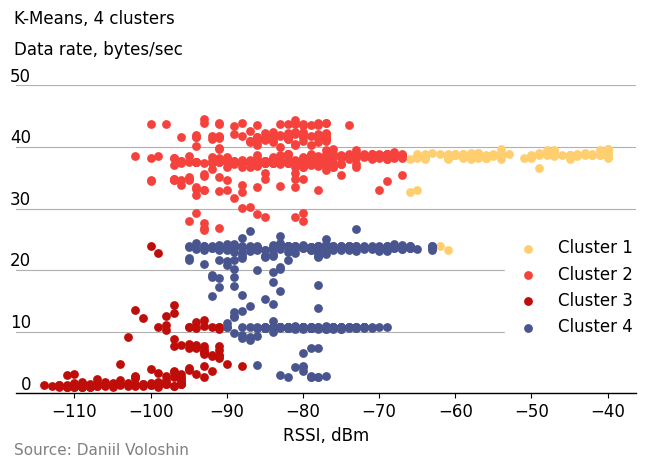

In [8]:
# Plot clusters
color_palette = [(191,14,9),(246,66,60),(255,169,166),(255,206,111),(255,228,175),(175,197,218),(121,158,194),(73,85,143),(235,233,224)]
plt.figure(figsize=(8, 4))

marker_size = 40
marker_alpha = 1
marker_edgecolor = (0.0,0.0,0.0)
marker_linewidth = 0 #0.2

plt.scatter(x[kmeans_predict == 0, 0], x[kmeans_predict == 0, 1], s = marker_size, zorder=2, c = [x/255 for x in color_palette[3]], alpha=marker_alpha, linewidth=marker_linewidth, edgecolor=marker_edgecolor, label = 'Cluster 1')
plt.scatter(x[kmeans_predict == 1, 0], x[kmeans_predict == 1, 1], s = marker_size, zorder=2, c = [x/255 for x in color_palette[1]], alpha=marker_alpha, linewidth=marker_linewidth, edgecolor=marker_edgecolor, label = 'Cluster 2')
plt.scatter(x[kmeans_predict == 2, 0], x[kmeans_predict == 2, 1], s = marker_size, zorder=2, c = [x/255 for x in color_palette[0]], alpha=marker_alpha, linewidth=marker_linewidth, edgecolor=marker_edgecolor, label = 'Cluster 3')
plt.scatter(x[kmeans_predict == 3, 0], x[kmeans_predict == 3, 1], s = marker_size, zorder=2, c = [x/255 for x in color_palette[7]], alpha=marker_alpha, linewidth=marker_linewidth, edgecolor=marker_edgecolor, label = 'Cluster 4')

plt.grid(axis='y', linestyle='-')
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=12);
plt.yticks(np.arange(0, 60, step=10), fontsize=12);
plt.ylim([0, 50])
plt.xlabel('RSSI, dBm', fontsize=12)
plt.tick_params(axis='y', length=0, which='both', pad=-11)
plt.gca().set_yticklabels(plt.gca().get_yticks(), va='bottom');
font_properties = {'size': 12}
plt.legend(edgecolor='white', facecolor='white', prop=font_properties, framealpha=1, bbox_to_anchor=(0.52, 0.05, 0.5, 0.5));

# Text
title_string = "K-Means, 4 clusters"
subtitle_string = "Data rate, bytes/sec"
source_str = "Source: Daniil Voloshin"
plt.text(-118, 60, title_string, color='black', fontsize=12, bbox=dict(facecolor='white', edgecolor='white', pad=1))
plt.text(-118, 55, subtitle_string, color='black', fontsize=12, bbox=dict(facecolor='white', edgecolor='white', pad=1))
plt.text(-118, -10, source_str, color='#808080', fontsize=11, bbox=dict(facecolor='white', edgecolor='white', pad=1))


#plt.savefig("plot3.png", dpi=400, bbox_inches='tight')
plt.show()

### Clustering (DBSCAN, 4 clusters)

In [9]:
x = df
#x = df[100:len(df)-1]
x = np.array(x)

db = DBSCAN(eps=3.3, min_samples=10).fit(x)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

#sns.scatterplot(data = x, x = x[:, 0], y = x[:, 1], hue = labels, legend = "full", palette = "deep");

Estimated number of clusters: 4
Estimated number of noise points: 17


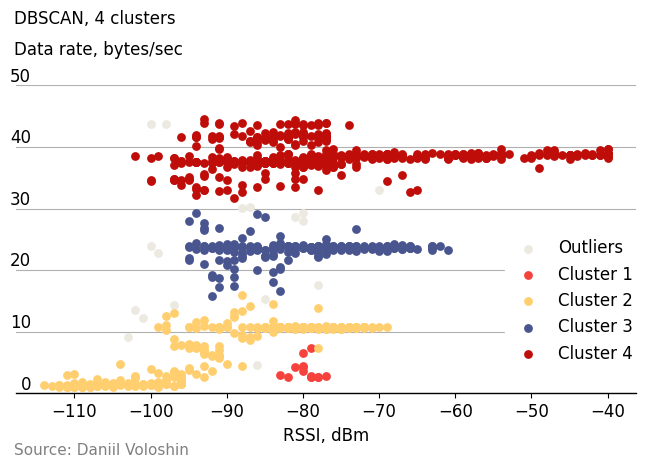

In [10]:
# Plot clusters
color_palette = [(191,14,9),(246,66,60),(255,169,166),(255,206,111),(255,228,175),(175,197,218),(121,158,194),(73,85,143),(235,233,224)]
plt.figure(figsize=(8, 4))

marker_size = 40
marker_alpha = 1
marker_edgecolor = (0.0,0.0,0.0)
marker_linewidth = 0 #0.2

plt.scatter(x[labels ==-1, 0], x[labels ==-1, 1], s = marker_size, zorder=2, c = [x/255 for x in color_palette[8]], alpha=marker_alpha, linewidth=marker_linewidth, edgecolor=marker_edgecolor, label = 'Outliers')
plt.scatter(x[labels == 0, 0], x[labels == 0, 1], s = marker_size, zorder=2, c = [x/255 for x in color_palette[1]], alpha=marker_alpha, linewidth=marker_linewidth, edgecolor=marker_edgecolor, label = 'Cluster 1')
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], s = marker_size, zorder=2, c = [x/255 for x in color_palette[3]], alpha=marker_alpha, linewidth=marker_linewidth, edgecolor=marker_edgecolor, label = 'Cluster 2')
plt.scatter(x[labels == 2, 0], x[labels == 2, 1], s = marker_size, zorder=2, c = [x/255 for x in color_palette[7]], alpha=marker_alpha, linewidth=marker_linewidth, edgecolor=marker_edgecolor, label = 'Cluster 3')
plt.scatter(x[labels == 3, 0], x[labels == 3, 1], s = marker_size, zorder=2, c = [x/255 for x in color_palette[0]], alpha=marker_alpha, linewidth=marker_linewidth, edgecolor=marker_edgecolor, label = 'Cluster 4')

plt.grid(axis='y', linestyle='-')
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=12);
plt.yticks(np.arange(0, 60, step=10), fontsize=12);
plt.ylim([0, 50])
plt.xlabel('RSSI, dBm', fontsize=12)
plt.tick_params(axis='y', length=0, which='both', pad=-11)
plt.gca().set_yticklabels(plt.gca().get_yticks(), va='bottom');
font_properties = {'size': 12}
plt.legend(edgecolor='white', facecolor='white', prop=font_properties, framealpha=1, bbox_to_anchor=(0.52, 0.05, 0.5, 0.5));

# Text
title_string = "DBSCAN, 4 clusters"
subtitle_string = "Data rate, bytes/sec"
source_str = "Source: Daniil Voloshin"
plt.text(-118, 60, title_string, color='black', fontsize=12, bbox=dict(facecolor='white', edgecolor='white', pad=1))
plt.text(-118, 55, subtitle_string, color='black', fontsize=12, bbox=dict(facecolor='white', edgecolor='white', pad=1))
plt.text(-118, -10, source_str, color='#808080', fontsize=11, bbox=dict(facecolor='white', edgecolor='white', pad=1))


#plt.savefig("plot4.png", dpi=400, bbox_inches='tight')
plt.show()

### Clustering (DBSCAN, 5 clusters)

In [11]:
x = df
#x = df[100:len(df)-1]
x = np.array(x)

db = DBSCAN(eps=3, min_samples=10).fit(x)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

#sns.scatterplot(data = x, x = x[:, 0], y = x[:, 1], hue = labels, legend = "full", palette = "deep");

Estimated number of clusters: 5
Estimated number of noise points: 36


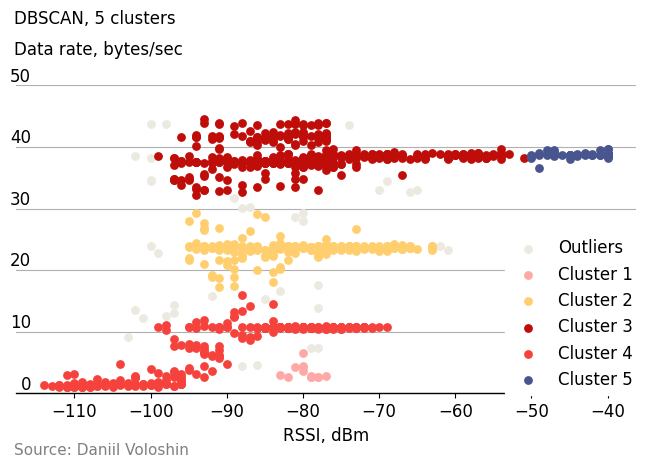

In [12]:
# Plot clusters
color_palette = [(191,14,9),(246,66,60),(255,169,166),(255,206,111),(255,228,175),(175,197,218),(121,158,194),(73,85,143),(235,233,224)]
plt.figure(figsize=(8, 4))

marker_size = 40
marker_alpha = 1
marker_edgecolor = (0.0,0.0,0.0)
marker_linewidth = 0 #0.2

plt.scatter(x[labels ==-1, 0], x[labels ==-1, 1], s = marker_size, zorder=2, c = [x/255 for x in color_palette[8]], alpha=marker_alpha, linewidth=marker_linewidth, edgecolor=marker_edgecolor, label = 'Outliers')
plt.scatter(x[labels == 0, 0], x[labels == 0, 1], s = marker_size, zorder=2, c = [x/255 for x in color_palette[2]], alpha=marker_alpha, linewidth=marker_linewidth, edgecolor=marker_edgecolor, label = 'Cluster 1')
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], s = marker_size, zorder=2, c = [x/255 for x in color_palette[3]], alpha=marker_alpha, linewidth=marker_linewidth, edgecolor=marker_edgecolor, label = 'Cluster 2')
plt.scatter(x[labels == 2, 0], x[labels == 2, 1], s = marker_size, zorder=2, c = [x/255 for x in color_palette[0]], alpha=marker_alpha, linewidth=marker_linewidth, edgecolor=marker_edgecolor, label = 'Cluster 3')
plt.scatter(x[labels == 3, 0], x[labels == 3, 1], s = marker_size, zorder=2, c = [x/255 for x in color_palette[1]], alpha=marker_alpha, linewidth=marker_linewidth, edgecolor=marker_edgecolor, label = 'Cluster 4')
plt.scatter(x[labels == 4, 0], x[labels == 4, 1], s = marker_size, zorder=2, c = [x/255 for x in color_palette[7]], alpha=marker_alpha, linewidth=marker_linewidth, edgecolor=marker_edgecolor, label = 'Cluster 5')

plt.grid(axis='y', linestyle='-')
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=12);
plt.yticks(np.arange(0, 60, step=10), fontsize=12);
plt.ylim([0, 50])
plt.xlabel('RSSI, dBm', fontsize=12)
plt.tick_params(axis='y', length=0, which='both', pad=-11)
plt.gca().set_yticklabels(plt.gca().get_yticks(), va='bottom');
font_properties = {'size': 12}
plt.legend(edgecolor='white', facecolor='white', prop=font_properties, framealpha=1, bbox_to_anchor=(0.52, 0.05, 0.5, 0.5));

# Text
title_string = "DBSCAN, 5 clusters"
subtitle_string = "Data rate, bytes/sec"
source_str = "Source: Daniil Voloshin"
plt.text(-118, 60, title_string, color='black', fontsize=12, bbox=dict(facecolor='white', edgecolor='white', pad=1))
plt.text(-118, 55, subtitle_string, color='black', fontsize=12, bbox=dict(facecolor='white', edgecolor='white', pad=1))
plt.text(-118, -10, source_str, color='#808080', fontsize=11, bbox=dict(facecolor='white', edgecolor='white', pad=1))


#plt.savefig("plot5.png", dpi=400, bbox_inches='tight')
plt.show()